# Overview: Building a Neural Network Framework with NumPy

In this assignment, you will build a simple **Multi-Layer Perceptron (MLP) framework** using only NumPy. By implementing each component step by step, you will gain a fundamental understanding of **forward and backward propagation**, **loss functions**, and **optimization techniques**.

Each part of the assignment builds on the previous one.

### Goal
To build a modular **Multi-Layer Perceptron (MLP)** framework using NumPy from scratch.

### Structure of the Assignment

Each section below builds towards the final goal of training an MLP. The first steps focus on implementing fundamental components, while later steps involve integrating them into a complete training pipeline.

#### **Step 1: Implementing Core Functions (70 points)**
- **Forward & Backward Passes (10 points):** Implement `affine_forward` and `affine_backward` to compute layer outputs and gradients.
- **Activation Functions (20 points):** Implement ReLU and Sigmoid functions (`relu_forward/backward`, `sigmoid_forward/backward`).
- **Loss Calculation (15 points):** Implement `mse_loss` to compute Mean Squared Error and its gradient.
- **Building a Multi-Layer Network (15 points):** Define a `FullyConnectedNet` class that integrates all layers and computes forward and backward passes.
- **Optimization (10 points):** Implement `sgd_momentum` to update parameters.

#### **Step 2: Training & Evaluation (30 points)**
- **Training (25 points):** Train the `FullyConnectedNet` using a `Solver` class.
- **Evaluation (5 points):** Assess the model on validation/test data.
**__Your score on this section is based on the result of your model and defines how well the previous sections are implemented.__*

In [1]:
!pip install pandas
!pip install torchvision

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.6 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.6 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.6 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.6 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.6 MB ? eta -:--:--
   ------ ----------------

In [1]:
from utils.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from utils.data import get_california_housing_data, get_california_housing_normalized__data
from builtins import range
import numpy as np
import matplotlib.pyplot as plt
from utils.solver import *
import pandas as pd
from sklearn.datasets import fetch_california_housing



%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)  # set default size of plots
plt.rcParams['image.cmap'] = 'gray'


def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))


def print_mean_std(x, axis=0):
    print(f"  means: {x.mean(axis=axis)}")
    print(f"  stds:  {x.std(axis=axis)}\n")

# Fully-Connected Neural Nets
In this exercise we will implement fully-connected networks using a modular approach. For each layer we will implement a generic `forward` and a `backward` function. The `forward` function will receive inputs, weights, and other parameters and will return both an output and a `cache` object storing data needed for the backward pass, like this:

```python
def layer_forward(x, w):
  """ Receive inputs x and weights w """
  # Do some computations ...
  z = # ... some intermediate value
  # Do some more computations ...
  out = # the output
   
  cache = (x, w, z, out) # Values we need to compute gradients
   
  return out, cache
```

The backward pass will receive upstream derivatives and the `cache` object, and will return gradients with respect to the inputs and weights, like this:

```python
def layer_backward(dout, cache):
  """
  Receive dout (derivative of loss with respect to outputs) and cache,
  and compute derivative with respect to inputs.
  """
  # Unpack cache values
  x, w, z, out = cache
  
  # Use values in cache to compute derivatives
  dx = # Derivative of loss with respect to x
  dw = # Derivative of loss with respect to w
  
  return dx, dw
```

After implementing a bunch of layers this way, we will be able to easily combine them to build different models with architectures.

# Affine layer: forward (5 Points)
Implement the `affine_forward` function.

In [2]:
def affine_forward(x, w, b):
    """
    Computes the forward pass for an affine (fully-connected) layer.

    The input x has shape (N, d_1, ..., d_k) and contains a minibatch of N
    examples, where each example x[i] has shape (d_1, ..., d_k). We will
    reshape each input into a vector of dimension D = d_1 * ... * d_k, and
    then transform it to an output vector of dimension M.

    Inputs:
    - x: A numpy array containing input data, of shape (N, d_1, ..., d_k)
    - w: A numpy array of weights, of shape (D, M)
    - b: A numpy array of biases, of shape (M,)

    Returns a tuple of:
    - out: output, of shape (N, M)
    - cache: (x, w, b)
    """
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    x_reshaped = x.reshape(x.shape[0], -1)  # Reshape to (N, D)
    print("Shape after reshaping input:", x_reshaped.shape)
    out = x_reshaped @ w + b  # compute out
    print("Shape after affine transformation:", out.shape)
    cache = (x, w, b)  # Values we need to compute gradients
    return out, cache


You can test your implementaion by running the following:

In [3]:
# Test the affine_forward function

num_inputs = 2
input_shape = (4, 5, 6)
output_dim = 3

input_size = num_inputs * np.prod(input_shape)
weight_size = output_dim * np.prod(input_shape)

x = np.linspace(-0.1, 0.5, num=input_size).reshape(num_inputs, *input_shape)
w = np.linspace(-0.2, 0.3, num=weight_size).reshape(np.prod(input_shape), output_dim)
b = np.linspace(-0.3, 0.1, num=output_dim)

out, _ = affine_forward(x, w, b)
correct_out = np.array([[1.49834967, 1.70660132, 1.91485297],
                        [3.25553199, 3.5141327, 3.77273342]])

# Compare your output with ours. The error should be around e-9 or less.
print('Testing affine_forward function:')
print('difference: ', rel_error(out, correct_out))

Shape after reshaping input: (2, 120)
Shape after affine transformation: (2, 3)
Testing affine_forward function:
difference:  9.769849468192957e-10


# Affine layer: backward (5 Points)
Now implement the `affine_backward` function and test your implementation using numeric gradient checking.


Given an affine transformation in a neural network:

$
Z = XW + b
$

where:
- $ X $ is the input matrix of shape $ (N, D) $
- $ W $ is the weight matrix of shape $ (D, M) $
- $ b $ is the bias vector of shape $ (1, M) $
- $ Z $ is the output before activation of shape $ (N, M) $

### Backward Pass Gradients:

1. **Gradient w.r.t. input $ X $:**
 $
   dX = dZ W^T
$
   (Shape: $ (N, D) $)

2. **Gradient w.r.t. weights $ W $:**
   $
   dW = X^T dZ
   $
   (Shape: $ (D, M) $)

3. **Gradient w.r.t. bias $ b $:**
   $
   db = \sum_{i=1}^{N} dZ_i
   $
   (Shape: $ (1, M) $)


In [4]:
def affine_backward(dout, cache):
    """
    Computes the backward pass for an affine layer.

    Inputs:
    - dout: Upstream derivative, of shape (N, M)
    - cache: Tuple of:
      - x: Input data, of shape (N, d_1, ... d_k)
      - w: Weights, of shape (D, M)
      - b: Biases, of shape (M,)

    Returns a tuple of:
    - dx: Gradient with respect to x, of shape (N, d1, ..., d_k)
    - dw: Gradient with respect to w, of shape (D, M)
    - db: Gradient with respect to b, of shape (M,)
    """
    x, w, b = cache
    N = x.shape[0]
    M = w.shape[1]

    #assert dout.shape == (N,M)

    x_reshaped = x.reshape(N, -1)

    dx = (dout @ w.T).reshape(x.shape)  # Derivative of loss with respect to x
    dw = x_reshaped.T @ dout  # Derivative of loss with respect to w
    db = np.sum(dout, axis=0)

    return dx, dw, db

In [5]:
# Test the affine_backward function
np.random.seed(231)
x = np.random.randn(10, 2, 3)
w = np.random.randn(6, 5)
b = np.random.randn(5)
dout = np.random.randn(10, 5)

dx_num = eval_numerical_gradient_array(lambda x: affine_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_forward(x, w, b)[0], b, dout)

_, cache = affine_forward(x, w, b)
dx, dw, db = affine_backward(dout, cache)
# The error should be around e-10 or less
print('Testing affine_backward function:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

Shape after reshaping input: (10, 6)
Shape after affine transformation: (10, 5)
Shape after reshaping input: (10, 6)
Shape after affine transformation: (10, 5)
Shape after reshaping input: (10, 6)
Shape after affine transformation: (10, 5)
Shape after reshaping input: (10, 6)
Shape after affine transformation: (10, 5)
Shape after reshaping input: (10, 6)
Shape after affine transformation: (10, 5)
Shape after reshaping input: (10, 6)
Shape after affine transformation: (10, 5)
Shape after reshaping input: (10, 6)
Shape after affine transformation: (10, 5)
Shape after reshaping input: (10, 6)
Shape after affine transformation: (10, 5)
Shape after reshaping input: (10, 6)
Shape after affine transformation: (10, 5)
Shape after reshaping input: (10, 6)
Shape after affine transformation: (10, 5)
Shape after reshaping input: (10, 6)
Shape after affine transformation: (10, 5)
Shape after reshaping input: (10, 6)
Shape after affine transformation: (10, 5)
Shape after reshaping input: (10, 6)
Sha

# ReLU activation: forward (5 Points)
Implement the forward pass for the ReLU activation function in the `relu_forward` function and test your implementation using numeric gradient checking.

In [6]:
def relu_forward(x):
    """
    Computes the forward pass for a layer of rectified linear units (ReLUs).

    Input:
    - x: Inputs, of any shape

    Returns a tuple of:
    - out: Output, of the same shape as x
    - cache: x
    """
    out = np.maximum(x, 0)  # compute ReLU(x)
    cache = x

    return out, cache

In [7]:
# Test the relu_forward function

x = np.linspace(-0.5, 0.5, num=12).reshape(3, 4)

out, _ = relu_forward(x)
correct_out = np.array([[0., 0., 0., 0., ],
                        [0., 0., 0.04545455, 0.13636364, ],
                        [0.22727273, 0.31818182, 0.40909091, 0.5, ]])

# Compare your output with ours. The error should be on the order of e-8
print('Testing relu_forward function:')
print('difference: ', rel_error(out, correct_out))

Testing relu_forward function:
difference:  4.999999798022158e-08


# ReLU activation: backward (5 Points)
Now implement the backward pass for the ReLU activation function in the `relu_backward` function.


ReLU Activation Backward Pass:

Given the ReLU activation function:

$ A = \max(0, Z) $

where $ A $ is the output after activation, and $ Z $ is the pre-activation input.

1. **Gradient w.r.t. pre-activation input $ Z $:**
   $
   dZ = dA \cdot \mathbb{1}(Z > 0)
   $
   
   (Element-wise multiplication where $ \mathbb{1}(Z > 0) $ is an indicator function that is $1$ when $ Z > 0 $ and 0 otherwise.)

In [8]:
def relu_backward(dout, cache):
    """
    Computes the backward pass for a layer of rectified linear units (ReLUs).

    Input:
    - dout: Upstream derivatives, of any shape
    - cache: Input x, of same shape as dout

    Returns:
    - dx: Gradient with respect to x
    """
    dx = dout * (cache > 0)  # Derivative of loss with respect to x

    return dx

You can test your implementation using numeric gradient checking:

In [9]:
# Test the relu_backward function
np.random.seed(231)
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = eval_numerical_gradient_array(lambda x: relu_forward(x)[0], x, dout)

_, cache = relu_forward(x)
dx = relu_backward(dout, cache)

# The error should be on the order of e-12
print('Testing relu_backward function:')
print('dx error: ', rel_error(dx_num, dx))

Testing relu_backward function:
dx error:  3.2756349136310288e-12


# Sigmoid activation: forward (5 Points)
Implement the forward pass for the Sigmoid activation function in the `sigmoid_forward` function and test your implementation using numeric gradient checking.

In [10]:
def sigmoid_forward(x):
    """
    Computes the forward pass for a layer of Sigmoid.

    Input:
    - x: Inputs, of any shape

    Returns a tuple of:
    - out: Output, of the same shape as x
    - cache: x
    """
    out = 1 / (1 + np.exp(-x))  # compute Sigmoid(x)
    cache = x

    return out, cache

In [11]:
# Test the sigmoid_forward function

x = np.linspace(-6, 6, num=12).reshape(3, 4)

out, _ = sigmoid_forward(x)
correct_out = np.array([[0.00247262, 0.00732514, 0.0214955, 0.06138311],
                        [0.16296047, 0.36691963, 0.63308037, 0.83703953],
                        [0.93861689, 0.9785045, 0.99267486, 0.99752738]])

# Compare your output with ours. The error should be on the order of e-7
print('Testing sigmoid_forward function:')
print('difference: ', rel_error(out, correct_out))

Testing sigmoid_forward function:
difference:  6.383174040859927e-07


# Sigmoid activation: backward (5 Points)
Now implement the backward pass for the Sigmoid activation function in the `sigmoid_backward` function.

Given the Sigmoid activation function:

$
A = \sigma(Z) = \frac{1}{1 + e^{-Z}}
$

where $ A $ is the output after activation, and $ Z $ is the pre-activation input.

The derivative of the Sigmoid function is:

$
\frac{dA}{dZ} = \sigma(Z) (1 - \sigma(Z))
$

The backward pass computes the gradient:

1. **Gradient w.r.t. pre-activation input $ Z $:**
   $
   dZ = dA \cdot \sigma(Z) (1 - \sigma(Z))
   $
   
   (Element-wise multiplication using the derivative of Sigmoid.)


In [12]:
def sigmoid_backward(dout, cache):
    """
    Computes the backward pass for a layer of Sigmoid.

    Input:
    - dout: Upstream derivatives, of any shape
    - cache: Input x, of same shape as dout

    Returns:
    - dx: Gradient with respect to x
    """
    sigmoid = 1 / (1 + np.exp(-cache))
    dx = dout * sigmoid * (1 - sigmoid)  # Derivative of loss with respect to x
    return dx

You can test your implementation using numeric gradient checking:

In [13]:
# Test the sigmoid_backward function
np.random.seed(231)
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = eval_numerical_gradient_array(lambda x: sigmoid_forward(x)[0], x, dout)

_, cache = sigmoid_forward(x)
dx = sigmoid_backward(dout, cache)

# The error should be on the order of e-11
print('Testing sigmoid_backward function:')
print('dx error: ', rel_error(dx_num, dx))

Testing sigmoid_backward function:
dx error:  3.446520386706568e-11


# Loss layer: MSE (15 Points)
Now implement the loss and gradient for mean squared error in the `mse_loss` function.

In [14]:
def mse_loss(x, y):
    """
    Computes the loss and gradient for MSE loss.

    Inputs:
    - x: Input data, of shape (N,) where x[i] is the predicted vector for
        the ith input.
    - y: Vector of target values, of shape (N,) where y[i] is the target value
        for the ith input.

    Returns a tuple of:
    - loss: Scalar giving the loss
    - dx: Gradient of the loss with respect to x
    """
    x_orig_shape = x.shape
    x = np.squeeze(x)

    MSE = np.mean((x - y) ** 2)  # compute MSE(x,y)
    N = x.shape[0]
    dx = (2.0 / N) * (x - y)  # Derivative of loss with respect to x
    dx = dx.reshape(x_orig_shape)  # match the shapes

    assert dx.shape == x_orig_shape, "Shape of gradient dx does not match the original shape of input data x"

    return MSE, dx

You can make sure that the implementations are correct by running the following:

In [15]:
np.random.seed(231)
num_inputs = 50
x = np.random.randn(num_inputs)
y = np.random.randn(num_inputs)

dx_num = eval_numerical_gradient(lambda x: mse_loss(x, y)[0], x, verbose=False)
loss, dx = mse_loss(x, y)

# Test mse_loss function. Loss should be close to 1.9 and dx error should be around e-9
print('\nTesting mse_loss:')
print('loss: ', loss)
print('dx error: ', rel_error(dx_num, dx))


Testing mse_loss:
loss:  1.8672282748726519
dx error:  2.8607953262121067e-09


# Multi-Layer Fully Connected Network (15 Points)
In this part, you will implement a fully connected network with an arbitrary number of hidden layers.

In [16]:
class FullyConnectedNet(object):
    """Class for a multi-layer fully connected neural network.

    Network contains an arbitrary number of hidden layers, ReLU nonlinearities,
    and a softmax loss function for a classification problem or the MSE loss function for
    a regression problem. The architecture will be

    {affine - relu} x (L - 1) - affine - softmax/mse

    where the {...} block is repeated L - 1 times.

    Learnable parameters are stored in the self.params dictionary and will be learned
    using the Solver class.
    """

    def __init__(
            self,
            hidden_dims,
            input_dim=784,
            output_dim=10,
            reg=0.0,
            weight_scale=1e-2,
            dtype=np.float32,
    ):
        """Initialize a new FullyConnectedNet.

        Inputs:

        - hidden_dims: A list of integers giving the size of each hidden layer.
        - input_dim: An integer giving the size of the input.
        - output_dim: An integer giving the number of classes to classify. It
            is 1 for a regression problem.
        - reg: Scalar giving L2 regularization strength.
        - weight_scale: Scalar giving the standard deviation for random
            initialization of the weights.
        - dtype: A numpy datatype object; all computations will be performed using
            this datatype. float32 is faster but less accurate, so you should use
            float64 for numeric gradient checking.
        """
        self.category = 'regression'
        self.reg = reg
        self.num_layers = 1 + len(hidden_dims)
        self.dtype = dtype
        self.params = {}

        ############################################################################
        # Initialize the parameters of the network, storing all values in          #
        # the self.params dictionary. Store weights and biases for the first layer #
        # in W1 and b1; for the second layer use W2 and b2, etc. Weights should be #
        # initialized from a normal distribution centered at 0 with standard       #
        # deviation equal to weight_scale. Biases should be initialized to zero.   #
        #                                                                          #
        ############################################################################
        layer_input_dim = input_dim
        for i, hdim in enumerate(hidden_dims):
            self.params[f'W{i + 1}'] = np.random.randn(layer_input_dim, hdim) * weight_scale
            self.params[f'b{i + 1}'] = np.zeros(hdim)
            layer_input_dim = hdim

        # Output layer
        self.params[f'W{self.num_layers}'] = np.random.randn(layer_input_dim, output_dim) * weight_scale
        self.params[f'b{self.num_layers}'] = np.zeros(output_dim)

        # Cast all parameters to the correct datatype.
        for k, v in self.params.items():
            self.params[k] = v.astype(dtype)

    def loss(self, X, y=None):
        """Compute loss and gradient for the fully connected net.

        Inputs:
        - X: Array of input data of shape (N, d_1, ..., d_k)
        - y: Array of labels / target values, of shape (N,). y[i] gives the
            label / target value for X[i].
        - show_distributions: Boolean that if enabled and y in none, show output
        of each layer to see effects of diffrent approaches

        Returns:
        If y is None, then run a test-time forward pass of the model and return
        scores for a classification problem or the predicted_values for
        a regression problem:
        - out: Array of shape (N, C) / (N, ) giving classification scores / predicted values, where
        scores[i, c] is the classification score for X[i] and class c / predicted_values[i]
        is the predicted value for X[i].


        If y is not None, then run a training-time forward and backward pass and
        return a tuple of:
        - loss: Scalar value giving the loss
        - grads: Dictionary with the same keys as self.params, mapping parameter
            names to gradients of the loss with respect to those parameters.
        """
        X = X.astype(self.dtype)
        mode = "test" if y is None else "train"

        ############################################################################
        # Implement the forward pass for the fully connected net, computing        #
        # the class scores / target values for X and storing them in the out       #
        #  variable.                                                               #
        #                                                                          #
        ############################################################################

        out = X
        self.layer_cache = {}
        layer_outputs = []  # Store layer outputs for visualization

        # Hidden layers
        for i in range(1, self.num_layers):
            out, fc_cache = affine_forward(out, self.params[f'W{i}'], self.params[f'b{i}'])
            out, relu_cache = relu_forward(out)
            self.layer_cache[i] = (fc_cache, relu_cache)
            layer_outputs.append(out)

        # Output layer (affine only)
        out, fc_cache = affine_forward(out, self.params[f'W{self.num_layers}'], self.params[f'b{self.num_layers}'])
        self.layer_cache[self.num_layers] = (fc_cache, None)

        # Save output for visualization
        layer_outputs.append(out)

        # If test mode return early.
        if mode == "test":
            return out

        loss, grads = 0.0, {}
        ############################################################################
        # Implement the backward pass for the fully connected net. Store the       #
        # loss in the loss variable and gradients in the grads dictionary. Compute #
        # data loss using mse, and make sure that grads[k] holds the               #
        # gradients for self.params[k]. Don't forget to add L2 regularization!     #
        #                                                                          #
        #                                                                          #
        # NOTE: To ensure that your implementation matches ours and you pass the   #
        # automated tests, make sure that your L2 regularization includes a factor #
        # of 0.5 to simplify the expression for the gradient.                      #
        ############################################################################

        # compute loss
        loss, dout = mse_loss(out, y)

        # Regularization
        for i in range(1, self.num_layers + 1):
            W = self.params[f'W{i}']
            loss += 0.5 * self.reg * np.sum(W * W)

        # Backpropagation affine
        dout_current = dout

        # Output layer
        fc_cache, _ = self.layer_cache[self.num_layers]
        dx, dW, db = affine_backward(dout_current, fc_cache)
        grads[f'W{self.num_layers}'] = dW + self.reg * self.params[f'W{self.num_layers}']
        grads[f'b{self.num_layers}'] = db
        dout_current = dx

        # Hidden layers (backprop through ReLU + affine)
        for i in reversed(range(1, self.num_layers)):
            fc_cache, relu_cache = self.layer_cache[i]
            dout_current = relu_backward(dout_current, relu_cache)
            dx, dW, db = affine_backward(dout_current, fc_cache)
            grads[f'W{i}'] = dW + self.reg * self.params[f'W{i}']
            grads[f'b{i}'] = db
            dout_current = dx

        return loss, grads

## Initial Loss and Gradient Check

As a sanity check, run the following to check the initial loss and to gradient check the network both with and without regularization. This is a good way to see if the initial losses seem reasonable.

For gradient checking, you should expect to see errors around 1e-7 or less.

In [17]:
np.random.seed(231)
N, D, H1, H2 = 2, 15, 20, 30
X = np.random.randn(N, D)
y = np.random.randint(123, size=(N,))

for reg in [0, 3.14]:
    print("Running check with reg = ", reg)
    model = FullyConnectedNet(
        [H1, H2],
        input_dim=D,
        output_dim=1,
        reg=reg,
        weight_scale=5e-2,
        dtype=np.float64
    )

    loss, grads = model.loss(X, y)
    print("Initial loss: ", loss)

    # Most of the errors should be on the order of e-7 or smaller.
    # NOTE: It is fine however to see an error for W2 on the order of e-5
    # for the check when reg = 0.0
    for name in sorted(grads):
        f = lambda _: model.loss(X, y)[0]
        grad_num = eval_numerical_gradient(f, model.params[name], verbose=False, h=1e-5)
        print(f"{name} relative error: {rel_error(grad_num, grads[name])}")

Running check with reg =  0
Shape after reshaping input: (2, 15)
Shape after affine transformation: (2, 20)
Shape after reshaping input: (2, 20)
Shape after affine transformation: (2, 30)
Shape after reshaping input: (2, 30)
Shape after affine transformation: (2, 1)
Initial loss:  5466.865706251272
Shape after reshaping input: (2, 15)
Shape after affine transformation: (2, 20)
Shape after reshaping input: (2, 20)
Shape after affine transformation: (2, 30)
Shape after reshaping input: (2, 30)
Shape after affine transformation: (2, 1)
Shape after reshaping input: (2, 15)
Shape after affine transformation: (2, 20)
Shape after reshaping input: (2, 20)
Shape after affine transformation: (2, 30)
Shape after reshaping input: (2, 30)
Shape after affine transformation: (2, 1)
Shape after reshaping input: (2, 15)
Shape after affine transformation: (2, 20)
Shape after reshaping input: (2, 20)
Shape after affine transformation: (2, 30)
Shape after reshaping input: (2, 30)
Shape after affine transf

## SGD+Momentum (10 Points)
Stochastic gradient descent with momentum is a widely used update rule that tends to make deep networks converge faster than vanilla stochastic gradient descent.

Implement the SGD+momentum update rule in the function `sgd_momentum`.

### Question:
How does the behavior of the optimization process, specifically the trajectory through the loss landscape, differ when using Stochastic Gradient Descent (SGD) with momentum compared to using vanilla SGD?

In [18]:
def sgd_momentum(w, dw, config=None):
    """
    Performs stochastic gradient descent with momentum.
    Inputs:
    - w: A numpy array giving the current weights.
    - dw: A numpy array of the same shape as w giving the gradient of the
    loss with respect to w.
    - config: A dictionary containing hyperparameter values such as learning
    rate, momentum.

    Returns:
      - next_w: The next point after the update.
      - config: The config dictionary to be passed to the next iteration of the
        update rule.

    config format:
    - learning_rate: Scalar learning rate.
    - momentum: Scalar between 0 and 1 giving the momentum value.
      Setting momentum = 0 reduces sgd_momentum to stochastic gradient descent.
    - velocity: A numpy array of the same shape as w and dw used to store a
      moving average of the gradients.
    """
    if config is None:
        config = {}
    config.setdefault("learning_rate", 1e-2)
    config.setdefault("momentum", 0.9)
    v = config.get("velocity", np.zeros_like(w))
    next_w = None

    v = v * config['momentum'] - config['learning_rate'] * dw  # compute the velocity
    next_w = w + v  # update weights

    config["velocity"] = v

    return next_w, config

Run the following to check your implementation. You should see errors less than e-8.

In [19]:
N, D = 4, 5
w = np.linspace(-0.4, 0.6, num=N * D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N * D).reshape(N, D)
v = np.linspace(0.6, 0.9, num=N * D).reshape(N, D)

config = {"learning_rate": 1e-3, "velocity": v}
next_w, _ = sgd_momentum(w, dw, config=config)

expected_next_w = np.asarray([
    [0.1406, 0.20738947, 0.27417895, 0.34096842, 0.40775789],
    [0.47454737, 0.54133684, 0.60812632, 0.67491579, 0.74170526],
    [0.80849474, 0.87528421, 0.94207368, 1.00886316, 1.07565263],
    [1.14244211, 1.20923158, 1.27602105, 1.34281053, 1.4096]])
expected_velocity = np.asarray([
    [0.5406, 0.55475789, 0.56891579, 0.58307368, 0.59723158],
    [0.61138947, 0.62554737, 0.63970526, 0.65386316, 0.66802105],
    [0.68217895, 0.69633684, 0.71049474, 0.72465263, 0.73881053],
    [0.75296842, 0.76712632, 0.78128421, 0.79544211, 0.8096]])

# Should see relative errors around e-8 or less
print("next_w error: ", rel_error(next_w, expected_next_w))
print("velocity error: ", rel_error(expected_velocity, config["velocity"]))

next_w error:  8.882347033505819e-09
velocity error:  4.269287743278663e-09


# Real World Application
Now that we have implemented the core functions and built a multilayer network, and tested it on random data to ensure it functions correctly, It is time to train the model on a real dataset. For this, we will use the California Housing dataset, which contains information about housing prices in different districts of California. The dataset includes features such as median income, house age, and population, making it a useful benchmark for regression tasks. Our goal is to train the network to predict house prices based on these features.

# California housing dataset
This is a dataset obtained from the [StatLib repository](https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html). The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data.

In [20]:
california_housing = fetch_california_housing(as_frame=True)
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [21]:
X_train, y_train, X_val, y_val, X_test, y_test = get_california_housing_data()
print('Train data shape: ', X_train.shape)
print('Train target values shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation target values shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test target values shape: ', y_test.shape)

Train data shape:  (15640, 8)
Train target values shape:  (15640,)
Validation data shape:  (2500, 8)
Validation target values shape:  (2500,)
Test data shape:  (2500, 8)
Test target values shape:  (2500,)


In [22]:
X_train, X_val, X_test = get_california_housing_normalized__data(X_train, X_val, X_test)

# Training (25)
Train the best fully connected model that you can on california housing, storing your best model in the `california_housing_best_model` variable.
Your final score depends on the accuracy(since your model is performing regression accuracy is equal to loss) of your best model reported in this notebook.

In [23]:
california_housing_best_model = None

data = {
    'X_train': X_train,
    'y_train': y_train.astype(int),
    'X_val': X_val,
    'y_val': y_val.astype(int),
    'X_test': X_test,
    'y_test': y_test.astype(int)
}

# feel free to define your own model and test with different models.
model = FullyConnectedNet(
    hidden_dims=[100, 50],
    input_dim=X_train.shape[1],
    output_dim=1,
    reg=1e-4,
    weight_scale=1e-2,
    dtype=np.float32
)

# feel free to change the hyper-parameters.
solver = Solver(model, data,
                update_rule=sgd_momentum,
                optim_config={
                    'learning_rate': 1e-3,
                },
                lr_decay=0.95,
                num_epochs=5, batch_size=200,
                print_every=100)
solver.train()

california_housing_solver = solver
california_housing_best_model = model

Shape after reshaping input: (200, 8)
Shape after affine transformation: (200, 100)
Shape after reshaping input: (200, 100)
Shape after affine transformation: (200, 50)
Shape after reshaping input: (200, 50)
Shape after affine transformation: (200, 1)
(Iteration 1 / 390) loss: 3.410102
Shape after reshaping input: (100, 8)
Shape after affine transformation: (100, 100)
Shape after reshaping input: (100, 100)
Shape after affine transformation: (100, 50)
Shape after reshaping input: (100, 50)
Shape after affine transformation: (100, 1)
Shape after reshaping input: (100, 8)
Shape after affine transformation: (100, 100)
Shape after reshaping input: (100, 100)
Shape after affine transformation: (100, 50)
Shape after reshaping input: (100, 50)
Shape after affine transformation: (100, 1)
Shape after reshaping input: (100, 8)
Shape after affine transformation: (100, 100)
Shape after reshaping input: (100, 100)
Shape after affine transformation: (100, 50)
Shape after reshaping input: (100, 50)
S

# Visualization (5)

Choose and apply several relevant visualization techniques to evaluate the performance and behavior of a regression model. For each chosen technique, provide:

1. A brief description of the method and its purpose.
2. A demonstration of the method. (plot it)
3. An explanation of the insights gained from the visualization, focusing on what it reveals about the model's effectiveness.

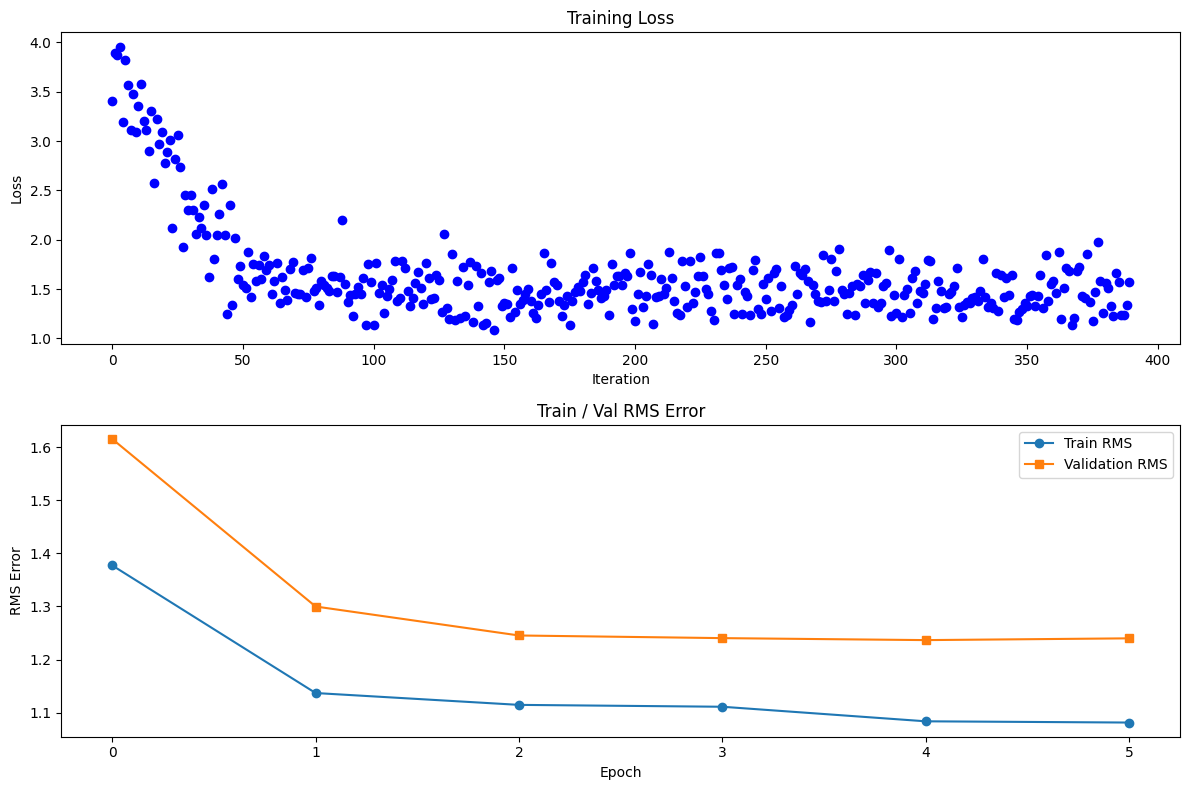

In [24]:
# Run this cell to visualize training loss and train / val RMS error


def visualize_training_results(solver, title_prefix=""):
    plt.figure(figsize=(12, 8))

    # Training loss (scatter)
    plt.subplot(2, 1, 1)
    iterations = np.arange(len(solver.loss_history))
    plt.scatter(iterations, solver.loss_history, c='blue', marker='o')
    plt.title(f'{title_prefix}Training Loss')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')

    # Plot train and validation RMS error
    plt.subplot(2, 1, 2)
    # Convert MSE to RMS
    train_rms = np.sqrt(np.array(solver.train_acc_history))
    val_rms = np.sqrt(np.array(solver.val_acc_history))
    plt.plot(train_rms, 'o-', label='Train RMS')
    plt.plot(val_rms, 's-', label='Validation RMS')
    plt.title(f'{title_prefix}Train / Val RMS Error')
    plt.xlabel('Epoch')
    plt.ylabel('RMS Error')
    plt.legend()

    plt.tight_layout()
    plt.show()


visualize_training_results(california_housing_solver)
